# SVM examples

## 1. Maximal margin classifier

### 1.1 library

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC  # SVC stands for : Support Vector Classification

### 1.2 Generate data

In [2]:
def linear_func1(x):
    l = len(x)
    return (3*x + 100 + 30 * np.random.randn(l))

def linear_func2(x):
    l = len(x)
    return (3*x - 100 + 30 * np.random.randn(l))

def generate_data(n):
    np.random.seed(328183)
    x1_1 = (np.random.random(int(0.5 * n)) - 0.5) * 100
    x2_1 = linear_func1(x1_1)
    x1_2 = (np.random.random(int(0.5 * n)) - 0.5) * 100
    x2_2 = linear_func2(x1_2)
    y_1 = np.ones(int(0.5 * n))
    y_2 = -1 * np.ones(int(0.5 * n))

    x1 = np.concatenate((x1_1, x1_2))
    x2 = np.concatenate((x2_1, x2_2))
    y = np.concatenate((y_1, y_2))
    X = np.array(list(zip(x1, x2)))

    return (X, y)

- generate_data에서 매개변수 n은 만들고자하는 데이터의 총 개수다.
- `(np.random.random(int(0.5 * n)) - 0.5) * 100`
    + 선형 분리할 두 종류의 데이터를 만들거라서 데이터의 개수에 0.5를 곱했다.
    + 만들어진 1/2 * n 개의 데이터에 0.5 값을 빼고 100을 곱한다. 전체 데이터에 적용된다.
- `np.random.random`과 `np.random.randn`의 차이는 전자는 uniform distribution, 후자는 standard normal distribution

### 2.3 SVM, draw chart

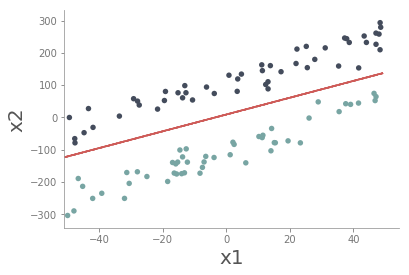

In [3]:
def svm(X, y):
    clf = SVC(C=np.inf, kernel='linear')
    clf.fit(X, y)
    return (clf)

def draw(X, y, clf):
    ###These are to make the figure clearer. You don't need to change this part.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('#999999')
    plt.gca().spines['left'].set_color('#999999')
    plt.xlabel('x1', fontsize=20, color='#555555'); plt.ylabel('x2', fontsize=20, color='#555555')
    plt.tick_params(axis='x', colors='#777777')
    plt.tick_params(axis='y', colors='#777777')    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.3  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='#CE5A57', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c = ['#444C5C' if yy == 1 else '#78A5A3' for yy in y], edgecolor='none', s=30)

    # plt.savefig("simplest_svm.png")
    plt.show()
    
    plt.close()

if __name__ == '__main__':
    X, y = generate_data(100)
    clf = svm(X, y)
    draw(X, y, clf) 

## 2. Soft Margin Classifier

- 1의 Maximal Margin Classifier의 코드와 똑같다.
- 다만 generate_data 함수에서 다음 코드처럼 outlier를 만들어준다.

    ```py
    y_1[-1 * n//50:] = -1.
    y_2[-1 * n//50:] = 1.
    ```
- 추가로 svm 함수에서 C 값을 기존 infinity에서 1로 조절한다.

    ```py
    clf = SVC(C=1., kernel='linear')
    ```
- 데이터에 outlier 분포만 추가되어 1 예제와 같은 그래프를 볼 수 있다.

## 3. Support Vector Machine

### 3.1 Library

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC  # SVC stands for : Support Vector Classification

### 3.2 Generate data

In [8]:
def nonlinear_func1(x):
    l = len(x)
    return (0.1 * pow(x, 3) + 0.2 * pow(x, 2) + 0.5 * x + 1000 + 3000 * np.random.random(l))

def nonlinear_func2(x):
    l = len(x)
    return (0.1 * pow(x, 3) + 0.2 * pow(x, 2) - 0.5 * x - 1000 - 3000 * np.random.random(l))

def generate_data(n):
    np.random.seed(32840091)

    x1_1 = (np.random.random(int(0.5 * n)) - 0.5) * 100
    x2_1 = nonlinear_func1(x1_1)
    x1_2 = (np.random.random(int(0.5 * n)) - 0.5) * 100
    x2_2 = nonlinear_func2(x1_2)
    y_1 = np.ones(int(0.5 * n))
    y_2 = -1 * np.ones(int(0.5 * n))

    x1 = np.concatenate((x1_1, x1_2))
    x2 = np.concatenate((x2_1, x2_2))
    y = np.concatenate((y_1, y_2))
    X = np.array(list(zip(x1, x2)))

    return (X, y)

- nonlinear_func : 비선형 데이터를 만드는 함수다. 리턴값을 보면 x의 3차항, 2차항, 1차항이 모두 존재한다.
- 아래 generate_data 부분은 앞의 예제와 같다.

### 3.3 SVM, Draw chart

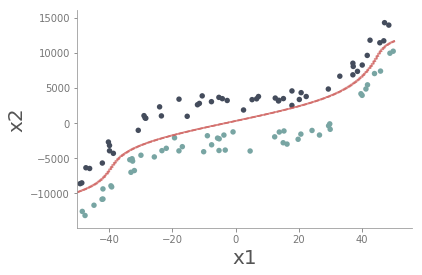

In [9]:
def svm(X, y):
    clf = SVC(kernel='rbf', C=np.inf, gamma=1e-8)
    clf.fit(X, y)
    return (clf)

def draw(X, y, clf):
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('#999999')
    plt.gca().spines['left'].set_color('#999999')
    plt.xlabel('x1', fontsize=20, color='#555555'); plt.ylabel('x2', fontsize=20, color='#555555')
    plt.tick_params(axis='x', colors='#777777')
    plt.tick_params(axis='y', colors='#777777')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.5  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='#CE5A57', alpha=0.25)
    plt.scatter(X[:, 0], X[:, 1], c = ['#444C5C' if yy == 1 else '#78A5A3' for yy in y], edgecolor='none', s=30)

    plt.show()

    plt.close()

if __name__ == '__main__':
    X, y = generate_data(100)
    clf = svm(X, y)
    draw(X, y, clf) 

- `clf = SVC(kernel='rbf', C=np.inf, gamma=1e-8)`
    + kernel은 rbf를 썼다.
    + C는 무한대 값으로 준다. 융통성을 강하게 발휘하겠다는 의미
    + gamma: Kernel 함수, 특히 ‘rbf’, ‘poly’, ‘sigmoid’의 함수의 coefficient 값이다. 디폴트 값은 ‘auto’이며 1/n_features 로 자동 조정된다.

## 4. Custom kernel

$$
k(x, y) = \sum_{i=1}^K(w_ix_i)(w_iy_i)
$$

- 연습 삼아 직접 커널 함수를 구현해서 사용할 수 있다.
- $N_1=2, N_2=3, K=2$ 일 때 데이터는 다음 꼴이고

    ```py
    X = [[1., 2.], [2., 3.]]
    Y = [[-1., -2.], [-2., -3.], [3., 4.]]
    w = [.5, -.25]
    ```

- 리턴해야할 값은 다음과 같다.

    ```py
    [|
        [
            k([1., 2.], [-1., -2.]),
            k([1., 2.], [-2., -3.]),
            k([1., 2.], [3., 4.])
        ],
        [
            k([2., 3.], [-1., -2.]),
            k([2., 3.], [-2., -3.]),
            k([2., 3.], [3., 4.])
        ]
    ]
    ```

- 커널 함수를 대입해서 계산하면 다음처럼 나온다.

    ```py
    [
        [-0.5   , -0.875 ,  1.25  ],
        [-0.875 , -1.5625,  2.25  ]
    ]
    ```

### 4.1 kernel

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn import svm

def linear_kernel(X, Y, w):
    result = []
    for i in range(len(X)):
        tmp = []
        for j in range(len(Y)):
            el_sum = 0
            for k in range(len(w)):
                el_sum += X[i][k] * Y[j][k] * (w[k] ** 2)
            tmp.append(el_sum)
        result.append(tmp)
    return np.array(result)

### 4.2 실행

In [2]:
def main():
    data = load_breast_cancer()
    
    X = data.data
    y = data.target
    n_rows = X.shape[0]
    n_cols = X.shape[1]
    print('Number of data : %d' % n_rows)
    print('Number of columns : %d' % n_cols)
    
    # Number of training and test data
    n_train = int(n_rows * 0.75)
    print('Number of training_data : %d' % n_train)
    
    # Randomly seperate training and test data
    idx = np.random.permutation(len(data.data))
    idx_train = idx[:n_train]
    idx_test = idx[-n_train:]
    
    # SVM using linear kernel function
    print('Using linear kernel function')
    
    # Train SVM with linear kernel
    clf_linear = svm.SVC(kernel = 'linear')
    clf_linear.fit(X[idx_train], y[idx_train])

    # Print training score
    print('training error : %.3f' % clf_linear.score(X[idx_train], y[idx_train]))

    # Print test score
    print('test error : %.3f' % clf_linear.score(X[idx_test], y[idx_test]))
        
    # SVM using custom kernel function
    print('Using custom kernel function')
    
    try:
        # Randomly pick kernel weights
        w = np.random.random(n_cols)
        my_kernel = (lambda X1, X2 : linear_kernel(X1, X2, w))
        
        # Train SVM with custom kernel
        clf_custom = svm.SVC(kernel = my_kernel)
        clf_custom.fit(X[idx_train], y[idx_train])

        # Print training score
        print('training error : %.3f' % clf_custom.score(X[idx_train], y[idx_train]))

        # Print test score
        print('test error : %.3f' % clf_custom.score(X[idx_test], y[idx_test]))
    
    except Exception as e:
        # Print Error
        print('Error : %s' % e)

if __name__ == "__main__":
    main()

Number of data : 569
Number of columns : 30
Number of training_data : 426
Using linear kernel function
training error : 0.965
test error : 0.972
Using custom kernel function
training error : 0.960
test error : 0.974
